In [142]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [143]:
file_url_1 = r'G:\\datamining\\data\\Wine Reviews\\winemag-data_first150k.csv'

# 加载数据集
raw_dataframe = pd.read_csv(file_url_1)


# 查看数据数量
print(type(raw_dataframe))
print(raw_dataframe.shape[0])
print(raw_dataframe.shape[1])
feature_name = [column for column in raw_dataframe] 
print(feature_name)
# print(raw_dataframe)
raw_dataframe[:10]

<class 'pandas.core.frame.DataFrame'>
150930
11
['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [144]:
# 标称属性
for i in feature_name[1:]:
    print(i + ':')
    print(raw_dataframe[i].value_counts())
    print('\n**********************************************\n')

country:
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12

Williams Selyem            374
Testarossa                 274
DFJ Vinhos                 258
Chateau Ste. Michelle      225
Columbia Crest             217
                          ... 
Lampyridae                   1
Bodegas Bernabe Navarro      1
Viridiana                    1
Point Concepción             1
Glinavos                     1
Name: winery, Length: 14810, dtype: int64

**********************************************



In [145]:
#五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
for i in ['points', 'price']:
    print('缺失值： ' + str(raw_dataframe[i].isna().sum()))
    x = raw_dataframe[i].dropna()
    Minimum=min(x)
    print(i + " 的最小值为："+ str(Minimum))
    Maximum=max(x)
    print(i + " 的最大值为："+ str(Maximum))
    Q1=np.percentile(x,25)
    print(i + " 的Q1值为："+ str(Q1))
    Median=np.median(x)
    print(i + " 的中位值为："+ str(Median))
    Q3=np.percentile(x,75)
    print(i + " 的Q3值为："+ str(Q3))
    print('\n**********************************************\n')

缺失值： 0
points 的最小值为：80
points 的最大值为：100
points 的Q1值为：86.0
points 的中位值为：88.0
points 的Q3值为：90.0

**********************************************

缺失值： 13695
price 的最小值为：4.0
price 的最大值为：2300.0
price 的Q1值为：16.0
price 的中位值为：24.0
price 的Q3值为：40.0

**********************************************



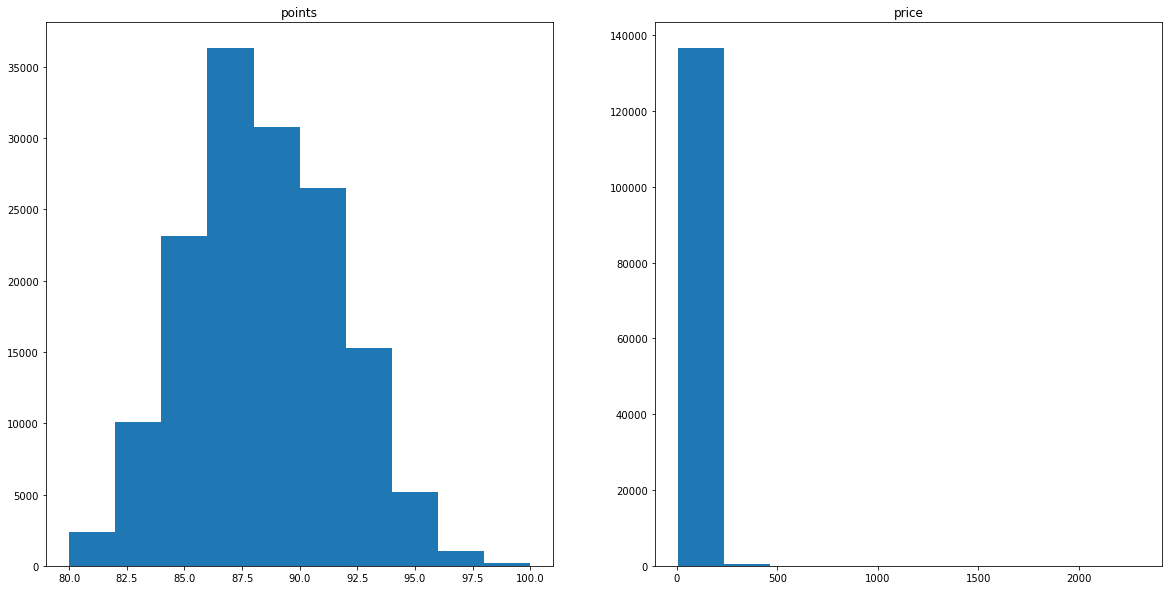

In [146]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.hist(raw_dataframe['points'].values.tolist())
plt.title('points')
plt.subplot(1, 2, 2)
plt.hist(raw_dataframe['price'].dropna().values.tolist())
plt.title('price')
plt.show()

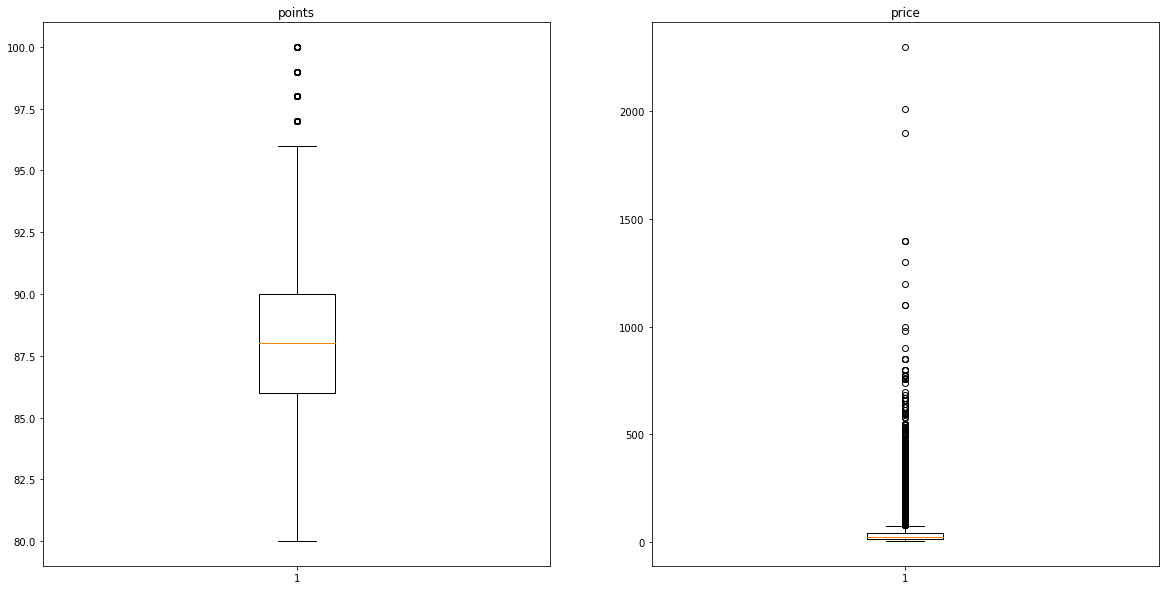

In [166]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.boxplot(raw_dataframe['points'].values.tolist())
plt.title('points')
plt.subplot(1, 2, 2)
plt.boxplot(raw_dataframe['price'].dropna().values.tolist())
plt.title('price')
plt.show()

In [167]:
# 将缺失部分剔除
dataframe_1 = raw_dataframe.dropna()
print(dataframe_1.shape[0])
print(dataframe_1.shape[1])

39241
11


In [168]:
# 用最高频率值来填补缺失值
dataframe_2 = raw_dataframe.copy(deep=True)
dataframe_2 = dataframe_2.fillna({"price":raw_dataframe.price.mode()})
print(dataframe_2.shape[0])
print(dataframe_2.shape[1])

150930
11


In [169]:
# 通过属性的相关关系来填补缺失值

# 查看相关性系数
print(raw_dataframe[['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']].corr())

# 针对数值数据price和point，利用先线性模型进行预测
# 训练线性回归模型进行填补
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

train = raw_dataframe.copy().loc[~raw_dataframe['price'].isna(),['points','price']].reset_index(drop=True)#波浪号取反
x = train[['points']]
y = train[['price']]
model = LinearRegression()
model.fit(x,y)

# 查看模型效果
print(f'R squared is: {r2_score(y, x)}')
print('intercept: ' + str(model.intercept_))
print('coef:      ' + str(model.coef_))

# 模型填充
dataframe_3 = raw_dataframe.copy(deep=True)
dataframe_3.loc[dataframe_3['price'].isna(),['price']] = model.predict(dataframe_3.loc[dataframe_3['price'].isna(),['points']])

          points     price
points  1.000000  0.459863
price   0.459863  1.000000
R squared is: -2.190587870838099
intercept: [-422.021462]
coef:      [[5.18468773]]


In [172]:
# 通过数据对象之间的相似性来填补缺失值

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 1000, weights = "uniform")

train_knn = raw_dataframe.copy(deep=True).loc[~raw_dataframe['price'].isna(),['points','price']].reset_index(drop=True)
x_knn = train_knn[['points']]
y_knn = train_knn[['price']]
model_knn.fit(x_knn, np.ravel(y_knn))

# 模型填充
dataframe_4 = raw_dataframe.copy(deep=True)
dataframe_4.loc[dataframe_4['price'].isna(),['price']] = model_knn.predict(dataframe_4.loc[dataframe_4['price'].isna(),['points']])

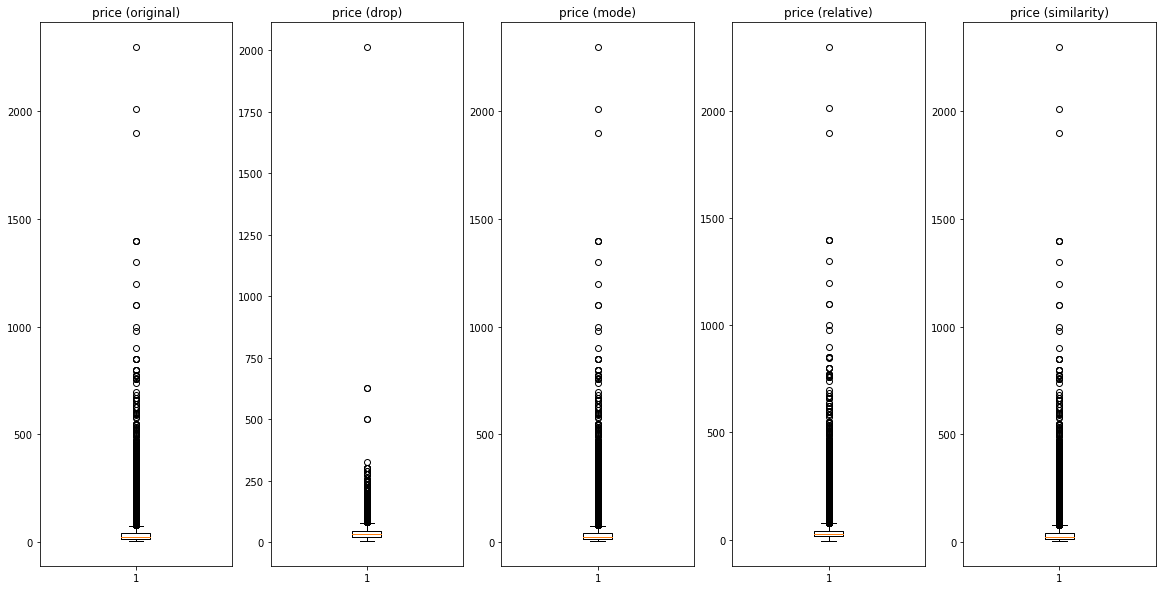

In [171]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 5, 1)
plt.boxplot(raw_dataframe['price'].dropna().values.tolist())
plt.title('price (original)')
plt.subplot(1, 5, 2)
plt.boxplot(dataframe_1['price'].values.tolist())
plt.title('price (drop)')
plt.subplot(1, 5, 3)
plt.boxplot(dataframe_2['price'].dropna().values.tolist())
plt.title('price (mode)')
plt.subplot(1, 5, 4)
plt.boxplot(dataframe_3['price'].values.tolist())
plt.title('price (relative)')
plt.subplot(1, 5, 5)
plt.boxplot(dataframe_4['price'].values.tolist())
plt.title('price (similarity)')
plt.show()

In [173]:
import os
print(os.path.abspath('.'))

C:\Users\LJdrgn
